# Table of contents
1. [Introduction](#introduction)
2. [Exploratory data Analysis](#paragraph1)
    1. [data loading](#subparagraph1)
    2. [data cleaning](#subparagraph2)
    3. [missing value](#subparagraph3)
    4. [outlier removal](#subparagraph4)
    5.[feature removal] (#subparagraph5)




In [113]:
import seaborn as sns

In [114]:
#!pip install pandas_profiling
import pandas_profiling as pf 

# Exploratory data Analysis

In [115]:
import pandas as pd

day_bike = pd.read_csv("day.csv",parse_dates=[1])


quick eda by pandas profiling

In [116]:
report=day_bike.profile_report(style={'full_width':True})

In [117]:
day_bike_visualistion=day_bike.copy()

In [118]:
report.to_file(output_file="D:/day_bike_eda1.html")


In [119]:
%matplotlib inline 

In [120]:
day_bike["mnth"] =day_bike['mnth'] .astype('category')
day_bike ["season"] =day_bike['season'] .astype('category')

day_bike ["weathersit"] =day_bike["weathersit"] .astype('category')

day_bike ['weekday'] = day_bike['weekday'] .astype('category')

In [121]:
day_bike['yr']=day_bike['yr'].astype('category')

In [122]:
day_bike['holiday']=day_bike['holiday'].astype('category')

day_bike['workingday']=day_bike['workingday'].astype('category')

In [123]:
day_bike.drop(columns=['instant','casual','registered','dteday'],inplace=True)

encoding all variable to respective category as mentioned in dataset

In [124]:

day_bike_visualistion ["season"] =day_bike_visualistion .season.map({1: 'Winter', 2 : 'Spring', 3 : 'Summer', 4 : 'Fall' }).astype('category')

day_bike_visualistion ["weathersit"] =day_bike_visualistion .weathersit.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " }).astype('category')

day_bike_visualistion ['weekday'] = day_bike_visualistion .weekday.map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}).astype('category')
day_bike_visualistion ['mnth'] =day_bike_visualistion .mnth.map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May',
                                      6: 'June' , 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}).astype('category')


In [125]:
day_bike_visualistion['yr']=day_bike_visualistion['yr'].map({0:2011,1:2012}).astype('category')



In [126]:
day_bike_visualistion['holiday']=day_bike_visualistion['holiday'].astype('category')

day_bike_visualistion['workingday']=day_bike_visualistion['workingday'].astype('category')

dropping casual and registered as we are going to predict it and dropping instant id  as  it is index and dteday also as it is all unique

In [127]:
day_bike_visualistion.drop(columns=['instant','casual','registered','dteday','yr'],inplace=True)

In [128]:
import numpy as np
numerical_columns = day_bike_visualistion.select_dtypes(include=[np.number]).columns

In [129]:
numerical_columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt'], dtype='object')

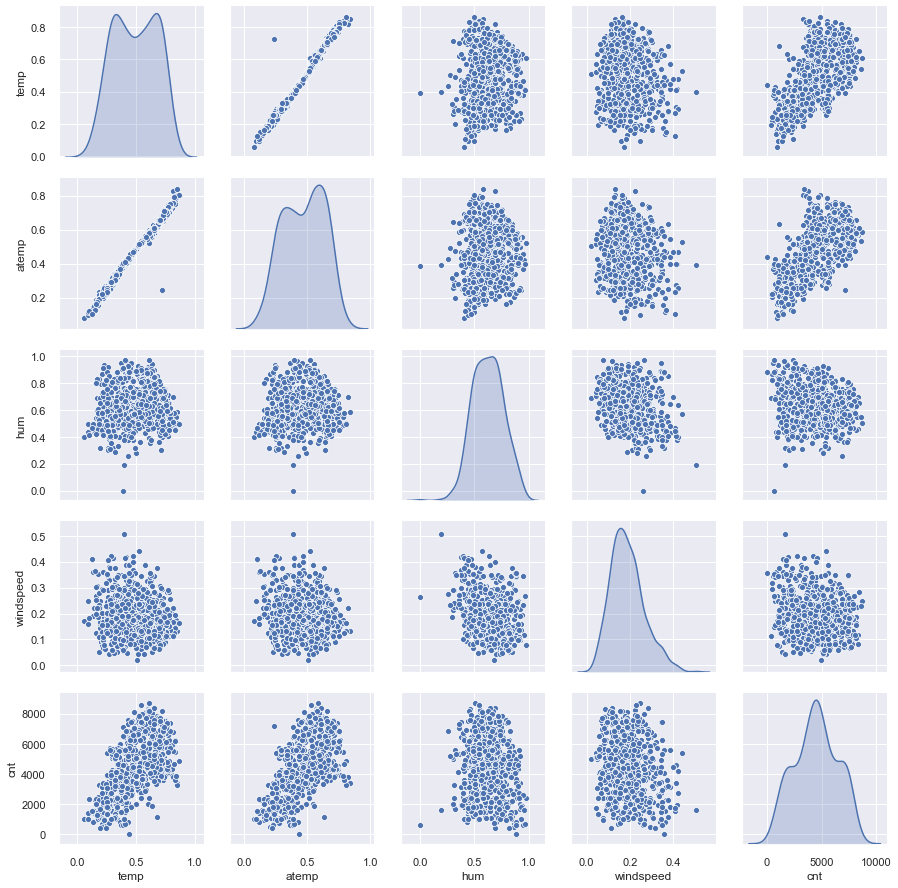

In [130]:

sns.pairplot(day_bike_visualistion[numerical_columns],kind='scatter',diag_kind='kde')

It can be infeered from above pairplot that one atemp and temp is  almost same and casula and  registered is  highly related to  cnt ,since casual and registered is  combined as cnt so we need to drop both casual and registered .for temp and atemp we need to further explore

missing value analysis

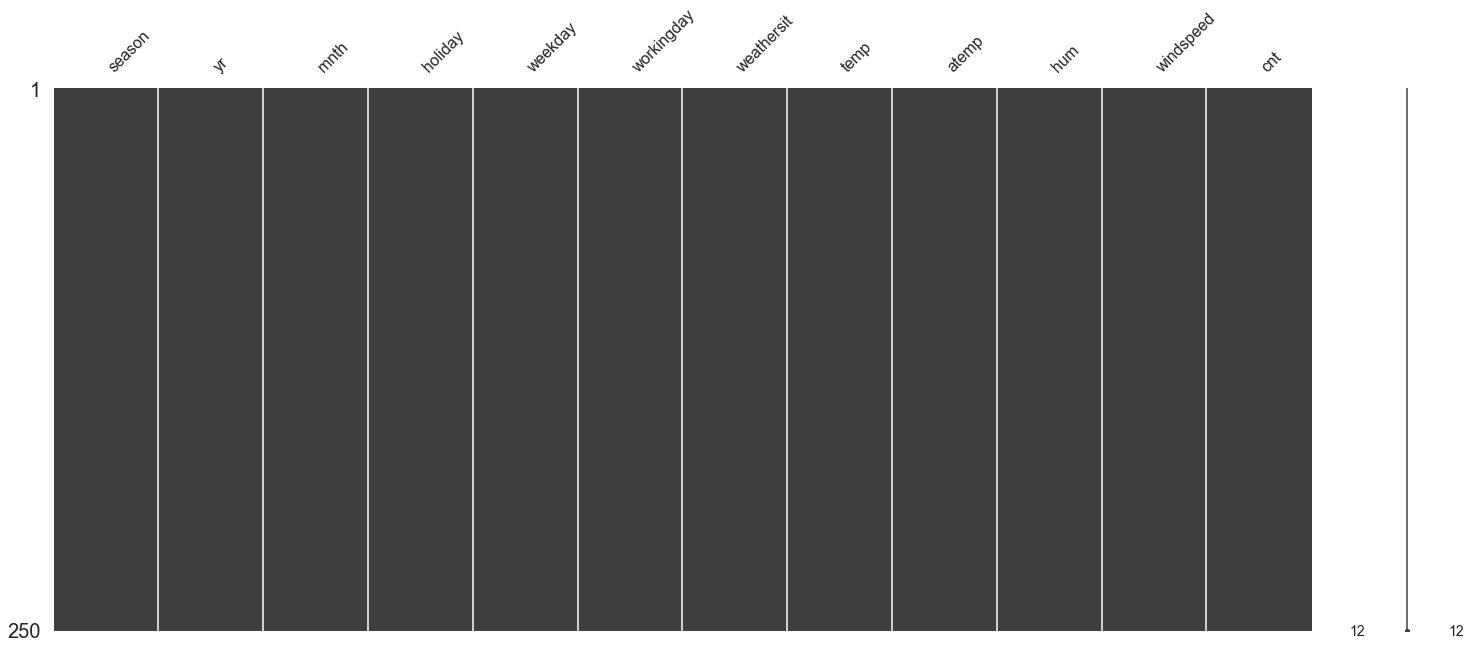

In [131]:
import missingno as msno
msno.matrix(day_bike.sample(250))

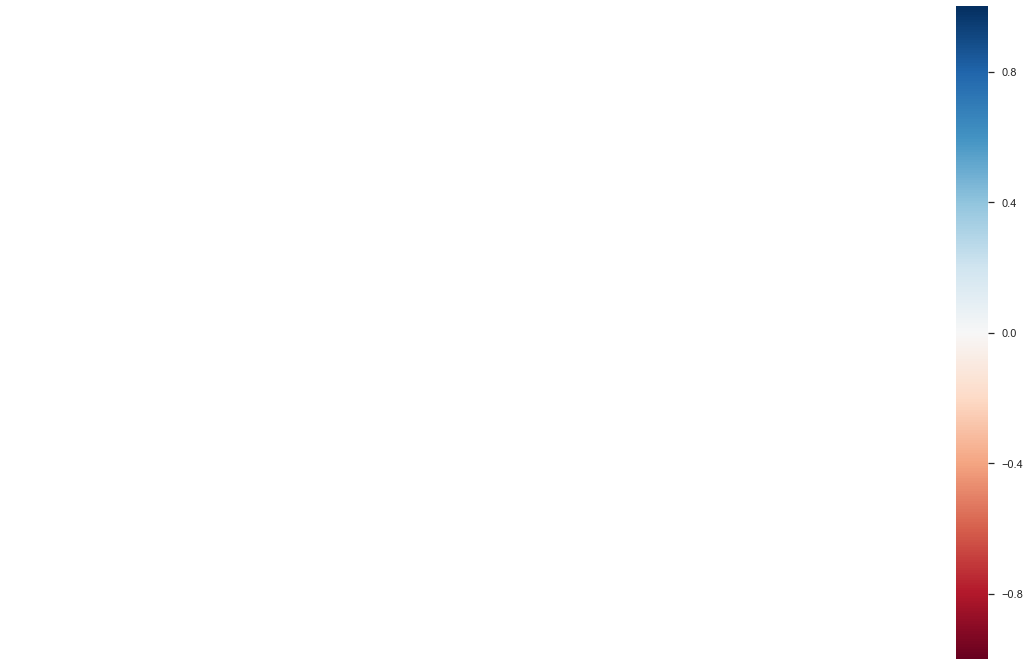

In [132]:
msno.heatmap(day_bike[numerical_columns])

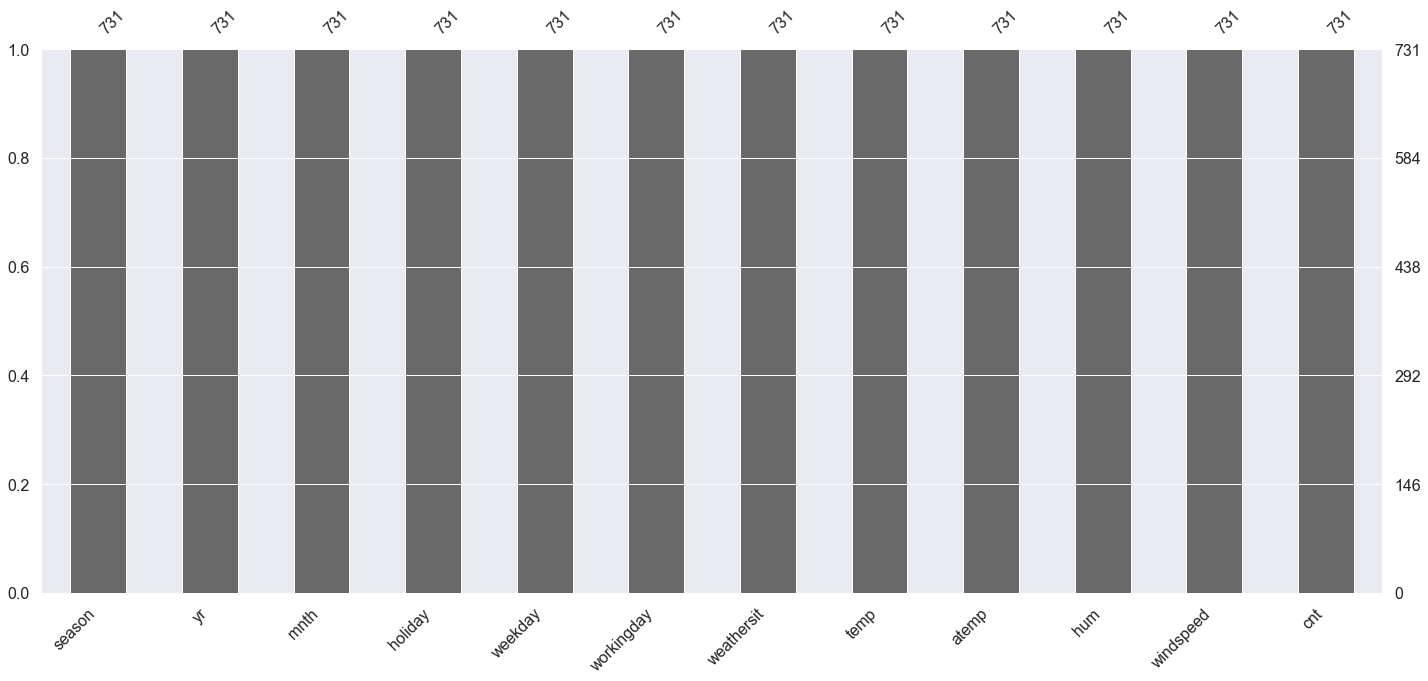

In [133]:
msno.bar(day_bike)

In [134]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,15)})

#outlier analysis using boxplot

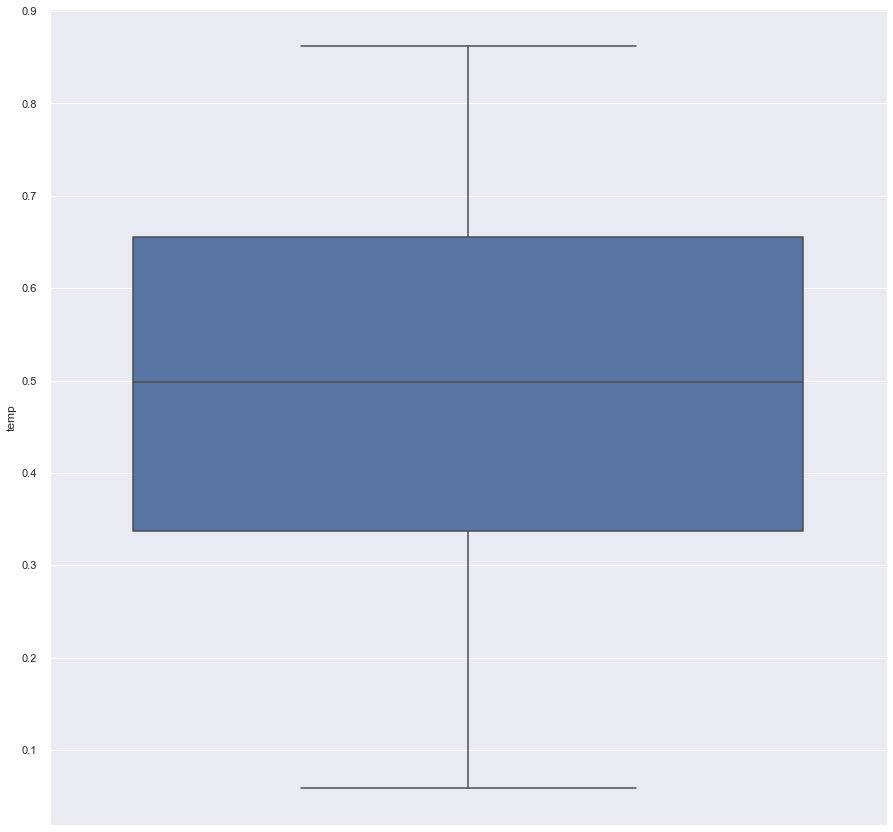

In [135]:
numerical_columns=day_bike.select_dtypes(include=[np.number]).columns
sns.boxplot(day_bike[numerical_columns[0]],orient='v')


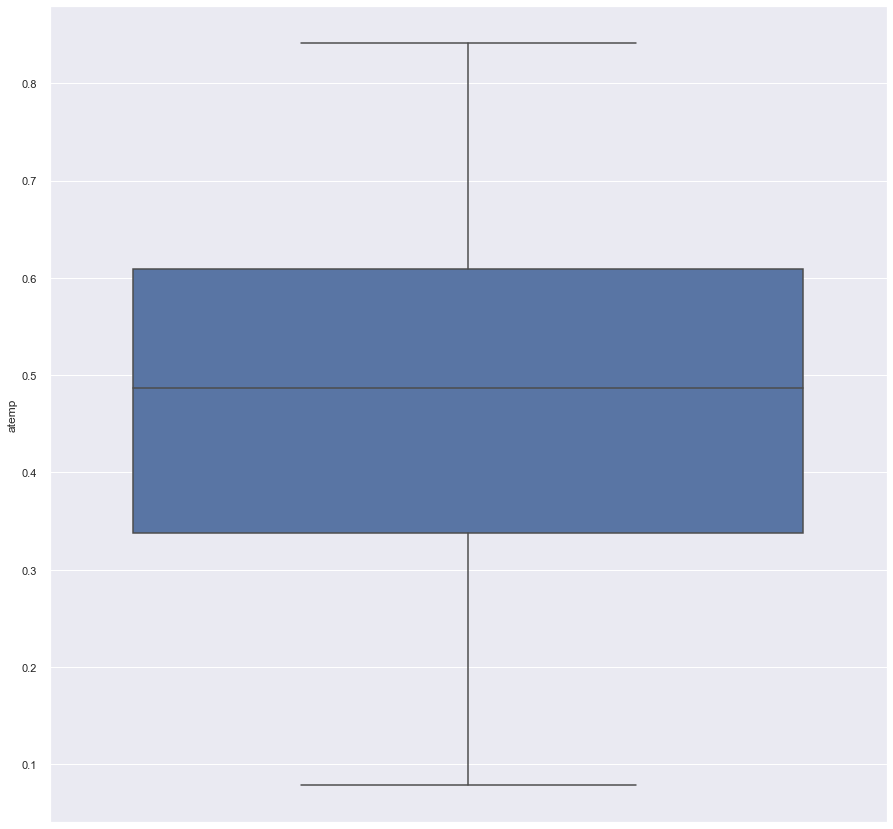

In [136]:
sns.boxplot(day_bike[numerical_columns[1]],orient='v')




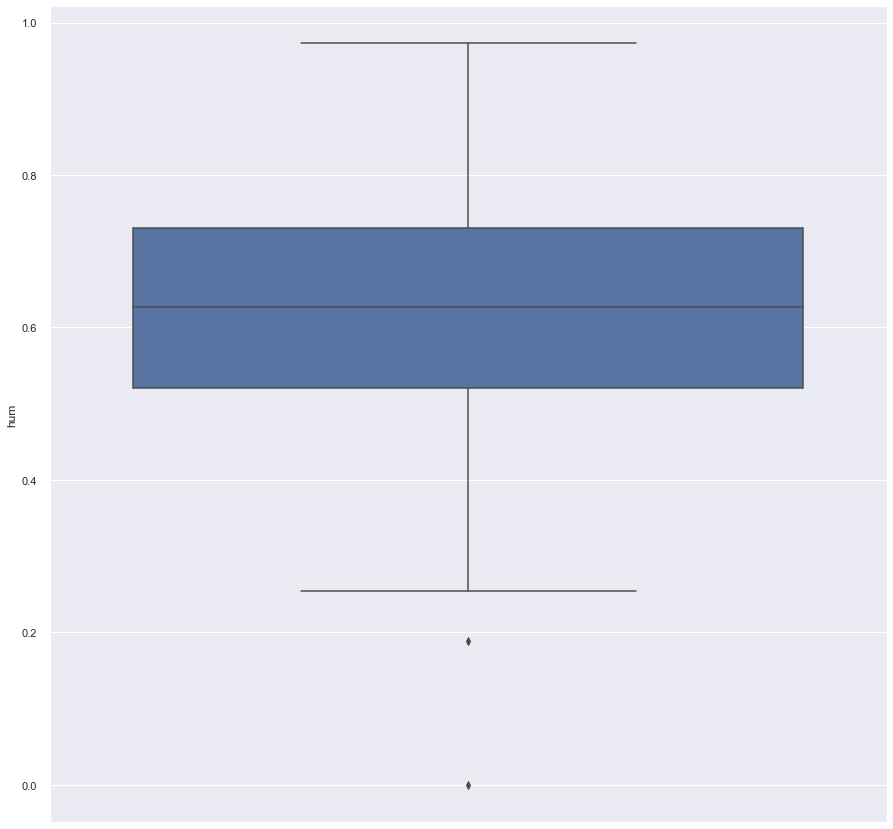

In [137]:
sns.boxplot(day_bike[numerical_columns[2]],orient='v')

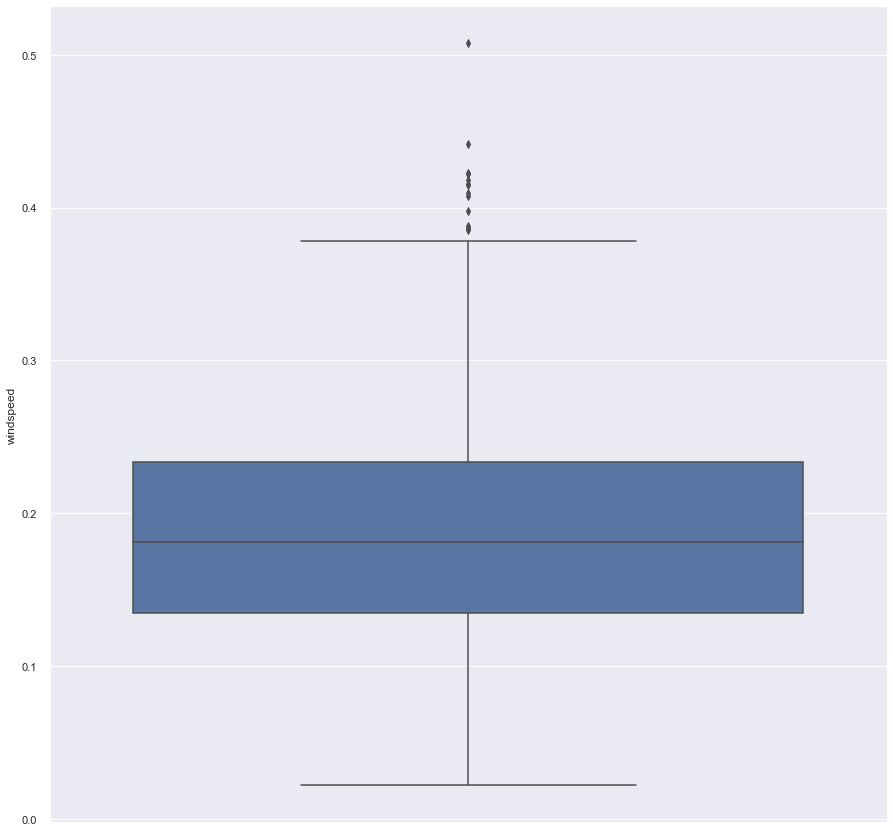

In [138]:
sns.boxplot(day_bike[numerical_columns[3]],orient='v')

it is clearly seen that there is outlier in humidity and windspeed

In [139]:
Q1 = day_bike[numerical_columns].quantile(0.25)
Q3 = day_bike[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


temp            0.318333
atemp           0.270760
hum             0.210209
windspeed       0.098265
cnt          2804.000000
dtype: float64


In [140]:
((day_bike[numerical_columns] < (Q1 - 1.5 * IQR)) |(day_bike[numerical_columns] > (Q3 + 1.5 * IQR))).sum()

temp          0
atemp         0
hum           2
windspeed    13
cnt           0
dtype: int64

In [142]:
day_bike = day_bike[~((day_bike[numerical_columns] < (Q1 - 1.5 * IQR)) |(day_bike[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

it can be seen that there are thirteen outliers inwindspeed and 2 in hum so since it is less than 15 percent we can remove it

In [143]:
day_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


Text(0.5, 0, 'humidity')

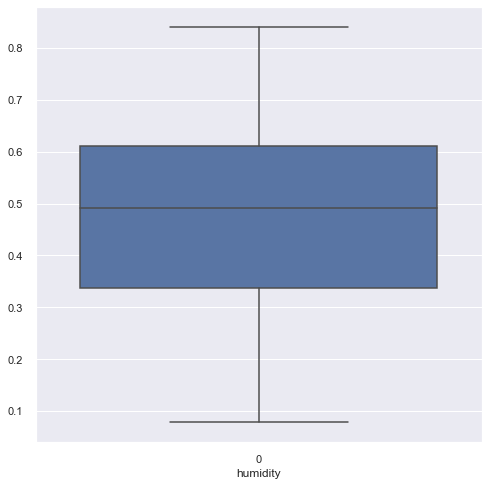

In [144]:
import matplotlib.pyplot as plt
sns.boxplot(data=day_bike[numerical_columns[1]],orient='v')
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.xlabel('humidity')

Text(0.5, 0, 'windspeed')

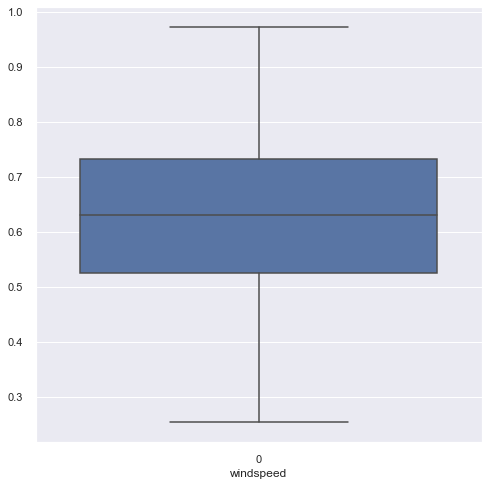

In [145]:
sns.boxplot(data=day_bike[numerical_columns[2]],orient='v')
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.xlabel('windspeed')

In [146]:
sns.set(rc={'figure.figsize':(8,8)})


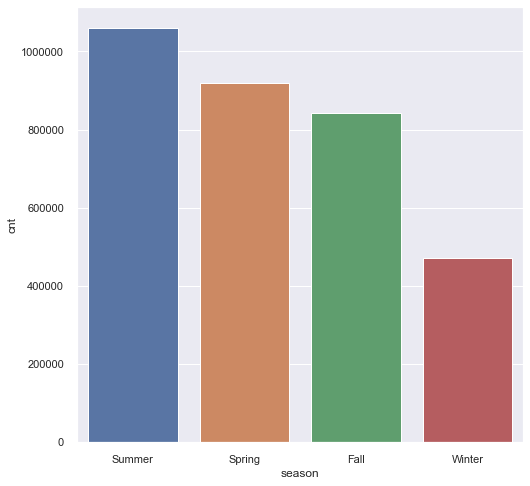

In [147]:
data=day_bike_visualistion.groupby('season')['cnt'].sum().reset_index().sort_values(by='cnt',ascending=False)
sns.barplot(x=data.season,y=data.cnt,order=list(data['season']))


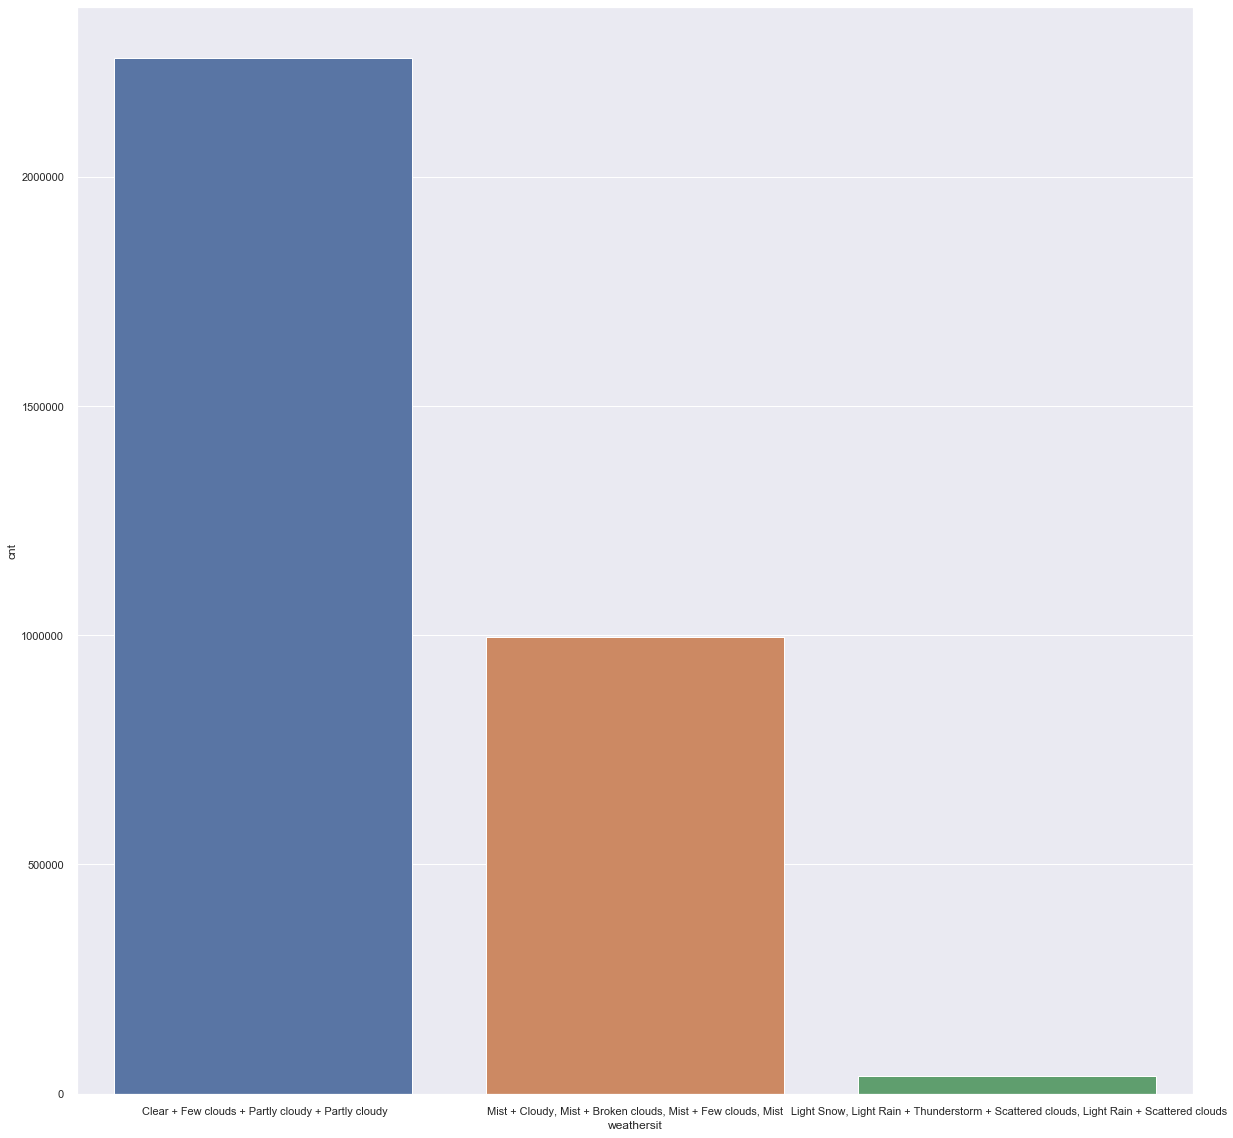

In [148]:
sns.set(rc={'figure.figsize':(20,20)})
data=day_bike_visualistion.groupby('weathersit')['cnt'].sum().reset_index().sort_values(by='cnt',ascending=False)
sns.barplot(x=data.weathersit,y=data.cnt,order=list(data['weathersit']))


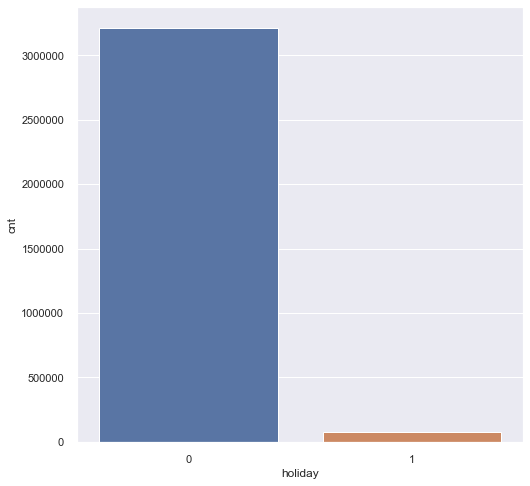

In [149]:
sns.set(rc={'figure.figsize':(8,8)})
data=day_bike_visualistion.groupby('holiday')['cnt'].sum().reset_index().sort_values(by='cnt',ascending=False)
sns.barplot(x=data.holiday,y=data.cnt,order=list(data['holiday']))


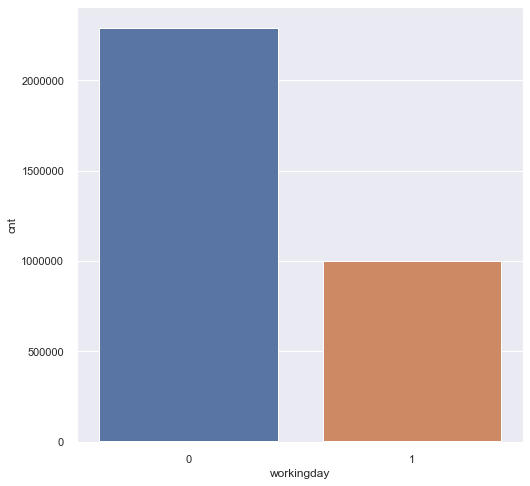

In [150]:
sns.set(rc={'figure.figsize':(8,8)})
data=day_bike_visualistion.groupby('workingday')['cnt'].sum().reset_index().sort_values(by='cnt',ascending=False)
sns.barplot(x=data.workingday,y=data.cnt,order=list(data['workingday']))
sns.barplot(data=day_bike_visualistion, x='workingday', y= 'cnt')
ax=sns.barplot(data=day_bike_visualistion, x='workingday', y= 'cnt')

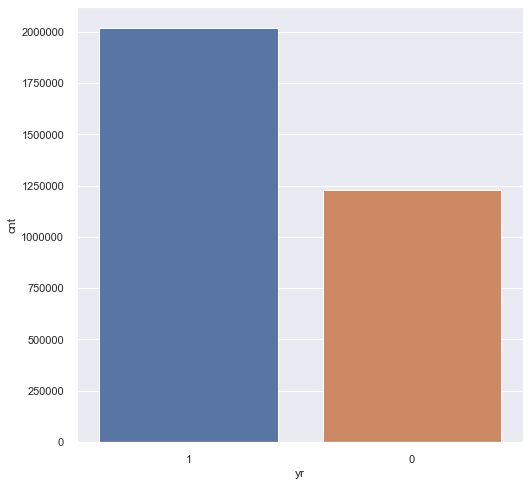

In [151]:
sns.set(rc={'figure.figsize':(8,8)})
data=day_bike.groupby('yr')['cnt'].sum().reset_index().sort_values(by='cnt',ascending=False)
sns.barplot(x=data.yr,y=data.cnt,order=list(data['yr']))


creating regplot of all numerical variable vs count

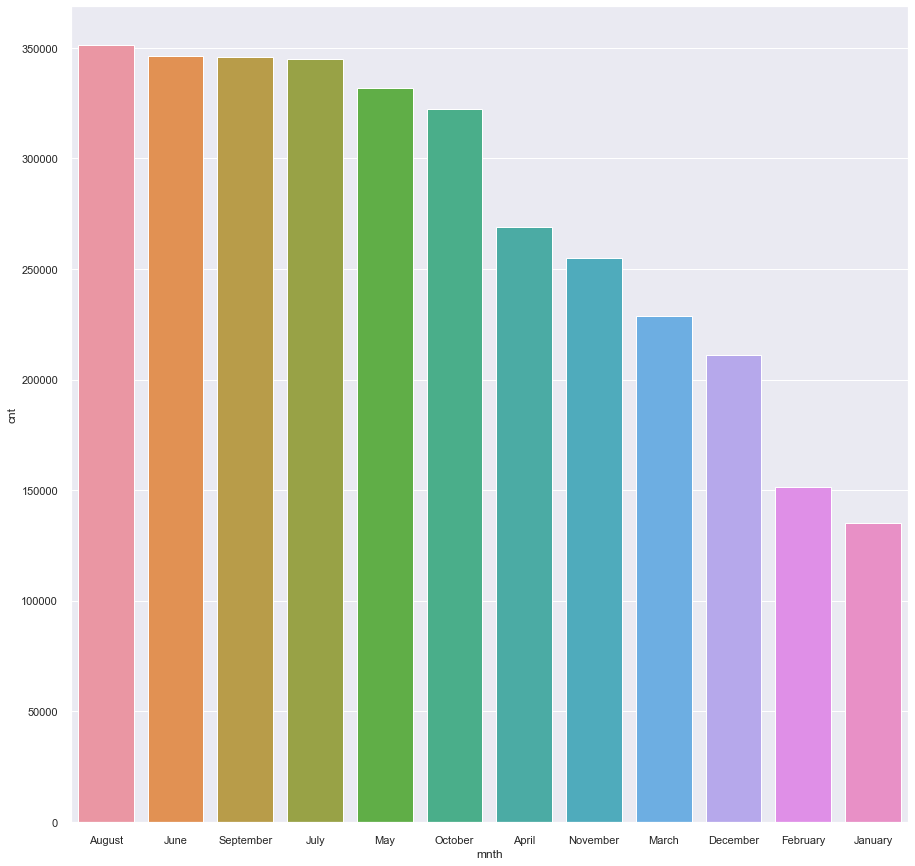

In [152]:
sns.set(rc={'figure.figsize':(15,15)})
data=day_bike_visualistion.groupby('mnth')['cnt'].sum().reset_index().sort_values(by='cnt',ascending=False)
sns.barplot(x=data.mnth,y=data.cnt,order=list(data['mnth']))

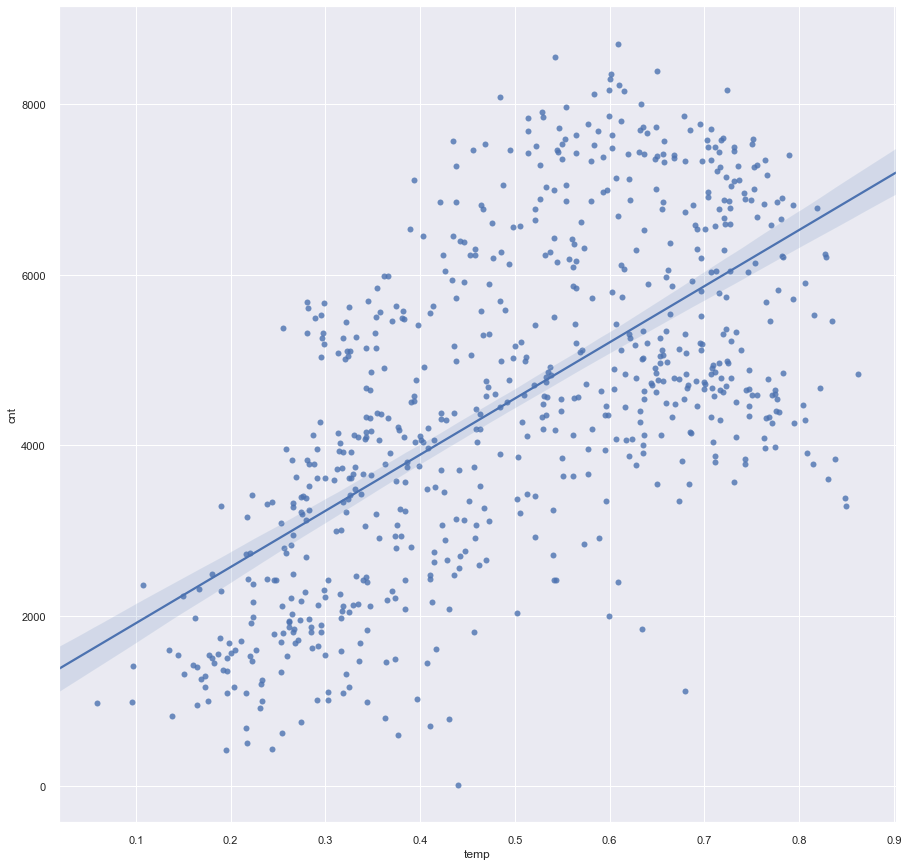

In [153]:
sns.regplot(x=numerical_columns[0],y='cnt',data=day_bike)

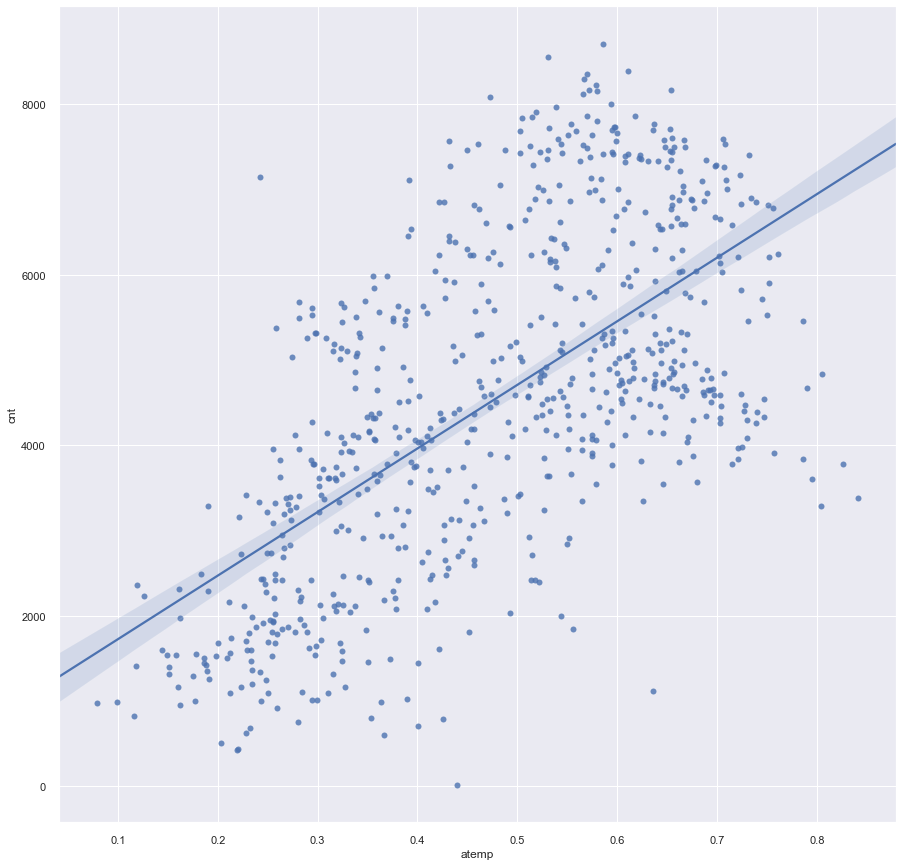

In [154]:
sns.regplot(x=numerical_columns[1],y='cnt',data=day_bike)

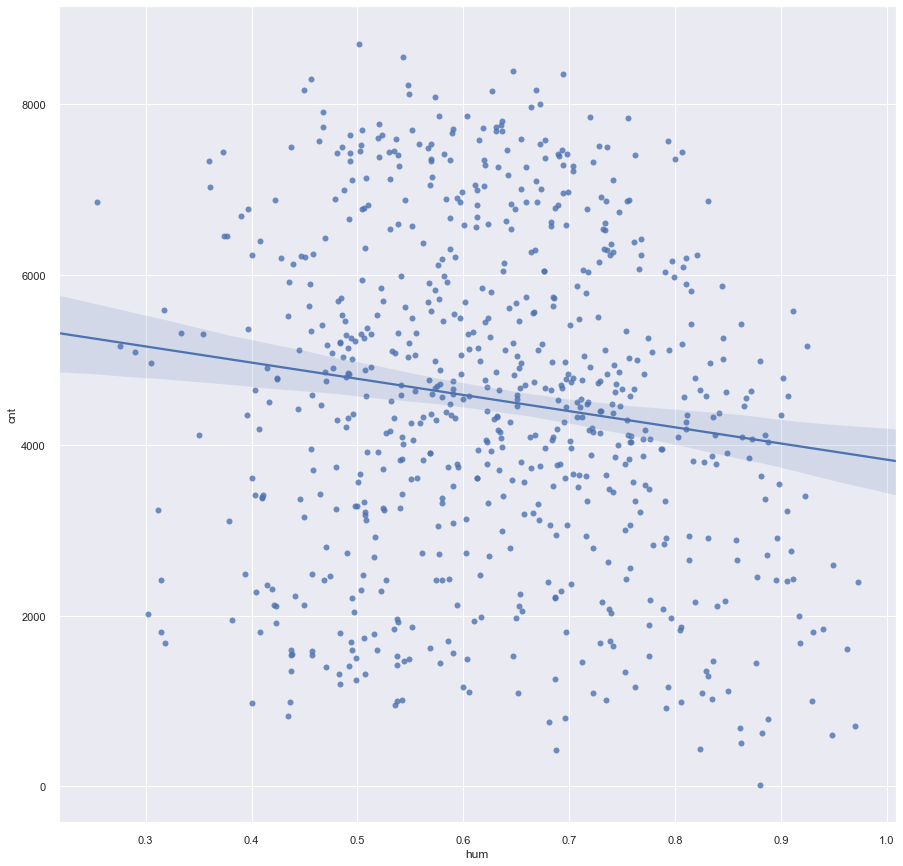

In [155]:
sns.regplot(x=numerical_columns[2],y='cnt',data=day_bike)

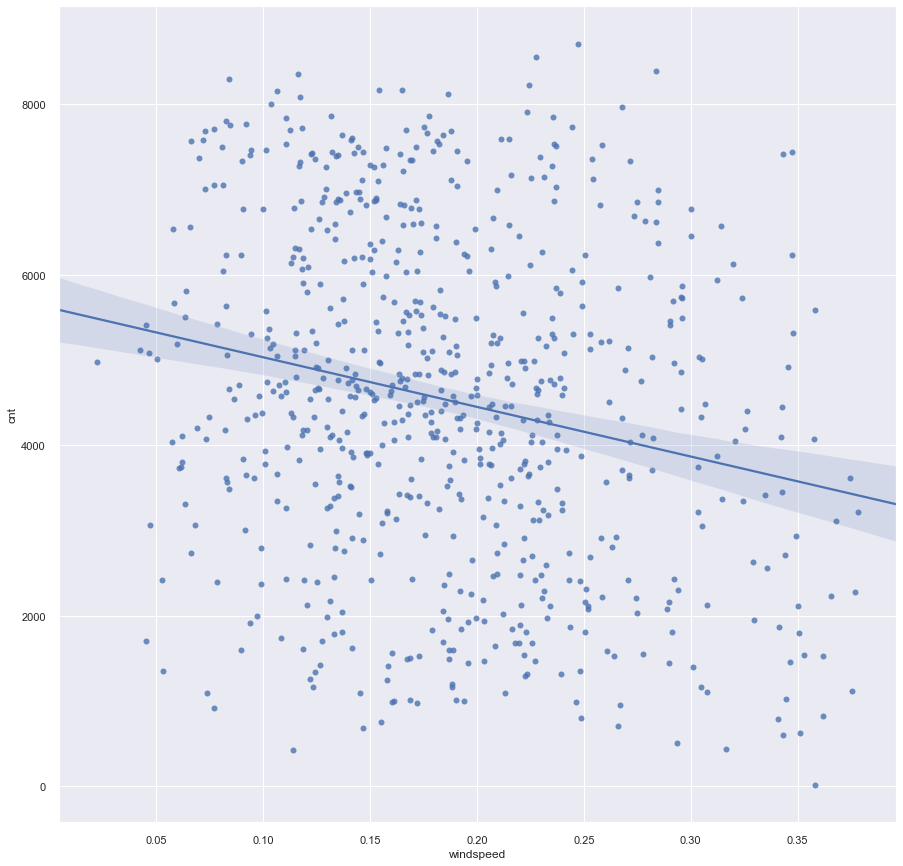

In [156]:
sns.regplot(x=numerical_columns[3],y='cnt',data=day_bike)

using correlation matrix to detect and remove multicolinearity

In [157]:
correlation = day_bike[numerical_columns].corr()

Index(['temp', 'atemp', 'cnt', 'hum', 'windspeed'], dtype='object')


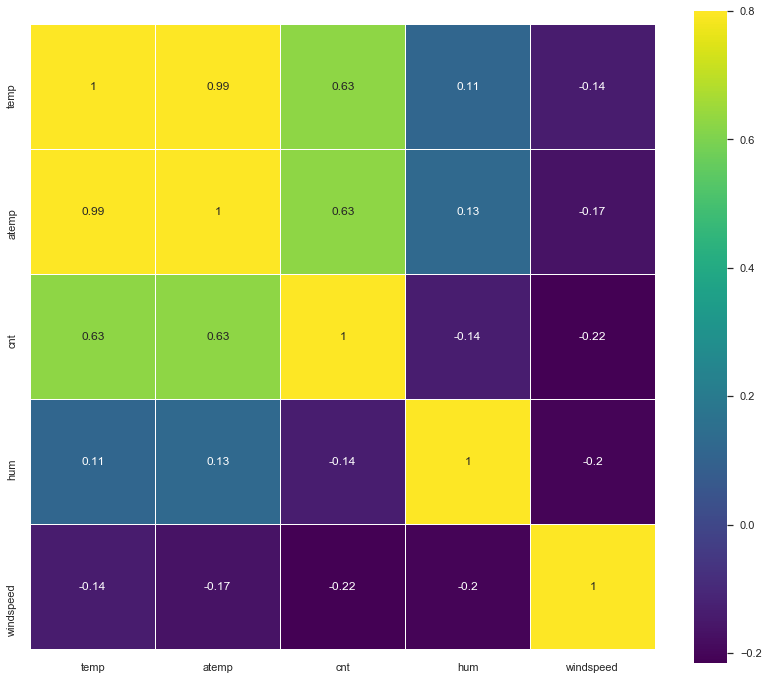

In [158]:

k_value= 11
columns = correlation.nlargest(k_value,'temp')['temp'].index
print(columns)
cmap1 = np.corrcoef(day_bike[columns].values.T)
f_a , axes = plt.subplots(figsize = (14,12))
sns.heatmap(cmap1, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = columns.values ,annot_kws = {'size':12},yticklabels = columns.values)

In [159]:
day_bike.drop(columns=['atemp'],inplace=True)

In [160]:
target=day_bike['cnt']
day_bike.drop(columns=['cnt'],inplace=True)

In [161]:
day_bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [162]:
columns=[i for i in day_bike.columns if str(day_bike[i].dtype)=='category']

doing feature selection by backward elimination

feature selection for linear regression model

In [163]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(day_bike, target, test_size=0.33, random_state=123)

In [164]:

data=day_bike
selected_columns=day_bike.columns
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(Xtrain.iloc[:,:].astype('float').values, ytrain.values, SL, selected_columns)

In [165]:
print(list(selected_columns))
print('total_columns:',list(Xtrain.columns))

['season', 'yr', 'weekday', 'workingday', 'weathersit', 'temp', 'windspeed']
total_columns: ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed']


In [166]:
selected_columns_for_regression=selected_columns

selecting columns for Xgbregressor using Boruta

In [167]:
#!pip install boruta

In [168]:
from sklearn.ensemble import RandomForestRegressor
import xgboost
from boruta import BorutaPy

In [169]:
rf = RandomForestRegressor()

In [170]:
feat_selector = BorutaPy(rf)



In [171]:
feat_selector.fit(Xtrain.astype('float').values,ytrain)

BorutaPy(alpha=0.05,
         estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                         max_depth=None, max_features='auto',
                                         max_leaf_nodes=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=1000, n_jobs=None,
                                         oob_score=False,
                                         random_state=<mtrand.RandomState object at 0x000001D43DD4BFC0>,
                                         verbose=0, warm_start=False),
         max_iter=100, n_estimators=1000, perc=100,
         random_state=<mtrand.RandomState object at 0x000001D43DD4BFC0>,
     

selecting important columns

In [172]:
columns_imp=[]
for i in range(0,len(Xtrain.columns)):
    if(feat_selector.support_[i]):
        columns_imp.append(Xtrain.columns[i])
columns_imp

['season', 'yr', 'mnth', 'weathersit', 'temp', 'hum', 'windspeed']

In [173]:
selected_column_xgb=columns_imp

creating dummies variable by dropping first dummy to avoid multicolinearity among dependent column

In [183]:
data_regression=day_bike[selected_columns_for_regression]
data_regression=pd.get_dummies(columns=[i for i in data_regression.columns if str(data_regression[i].dtype)=='category'],data=data_regression,drop_first=True)

In [184]:
data_xgb_regression=day_bike[selected_column_xgb]
data_xgb_regression=pd.get_dummies(columns=[i for i in data_xgb_regression.columns if str(data_xgb_regression[i].dtype)=='category'],data=data_xgb_regression,drop_first=True)



creating test train data  for both Xgb and linear regression

In [185]:
Xtrain_r, Xtest_r, ytrain_r, ytest_r= train_test_split(data_regression, target, test_size=0.33, random_state=123)
    

In [186]:
Xtrain_x, Xtest_x, ytrain_x, ytest_x= train_test_split(data_xgb_regression, target, test_size=0.33, random_state=42)
    

In [212]:

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


In [213]:
model = sm.OLS(ytrain_r.iloc[:].astype(float), Xtrain_r.iloc[:].astype(float)).fit()

In [214]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1109.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):                        0.00
Time:                        20:37:33   Log-Likelihood:                         -3897.8
No. Observations:                 480   AIC:                                      7826.
Df Residuals:                     465   BIC:                                      7888.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [215]:
selected_columns_for_regression

Index(['season', 'yr', 'weekday', 'workingday', 'weathersit', 'temp',
       'windspeed'],
      dtype='object')

In [216]:
preds=model.predict(Xtest_r)
dataframe=pd.DataFrame({'actual':ytest_r,'predicted':(preds)})
dataframe

,actual,predicted
226,4338,4452.705224
430,3956,3681.281685
649,7570,6296.539096
653,5875,5999.818902
342,3620,3642.200089
473,4367,5559.532319
521,7001,5731.924171
183,4649,3627.773699
595,7865,6746.597840
265,2395,4766.049577


In [217]:

#Function for Mean Absolute Percentage Error
def MAPE(y_actual,y_pred):
    mape = np.mean(np.abs((y_actual - y_pred)/y_actual))
    return mape

In [218]:
MAPE(ytest_r,preds)

0.1829491904514197

In [219]:
SS_Residual = sum((ytest_r-preds)**2)
SS_Total = sum((ytest_r-np.mean(ytest_r))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(ytest_r)-1)/(len(ytest_r)-Xtest_r.shape[1]-1)
print (r_squared, adjusted_r_squared)

0.7944815869715298 0.7805323734175612


In [220]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(ytest_r, preds))
rmse_train= np.sqrt(mean_squared_error(ytrain_r,model.predict(Xtrain_r)))
print("RMSE: %f" % (rmse))
print("RMSE: %f" % (rmse_train))

RMSE: 859.048476
RMSE: 813.592434


In [221]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [222]:
regr = linear_model.LinearRegression()

In [223]:
regr.fit(Xtrain_r, ytrain_r)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [224]:
MAPE(ytest_r,preds)

0.1829491904514197

In [225]:
SS_Residual = sum((ytest_r-preds)**2)
SS_Total = sum((ytest_r-np.mean(ytest_r))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(ytest_r)-1)/(len(ytest_r)-Xtest_r.shape[1]-1)
print (r_squared, adjusted_r_squared)

0.7944815869715298 0.7805323734175612


In [226]:
MAPE(ytest_r,preds)

0.1829491904514197

In [227]:
import xgboost


In [228]:
model = xgboost.XGBRegressor()

In [229]:
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [230]:
model.fit(Xtrain_x,ytrain_x)

[20:38:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [231]:
preds=model.predict(Xtest_x)

In [232]:
SS_Residual = sum((ytest_x-preds)**2)
SS_Total = sum((ytest_x-np.mean(ytest_x))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(ytest_x)-1)/(len(ytest_x)-Xtest_x.shape[1]-1)
print (r_squared, adjusted_r_squared)

0.8900378155185579 0.8798561317702762


In [233]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(ytest_x, preds))
rmse_train= np.sqrt(mean_squared_error(ytrain_x,model.predict(Xtrain_x)))
print("RMSE: %f" % (rmse))
print("RMSE: %f" % (rmse_train))

RMSE: 644.448971
RMSE: 458.138063


In [208]:
MAPE(ytest_x,preds)

0.59829870588898

In [209]:
from sklearn.model_selection import cross_validate
#Additional scklearn functions

from sklearn.model_selection import GridSearchCV

In [210]:
import datetime
start_time  = datetime.datetime.now()
xgb_clf=xgboost.XGBRegressor()
parameters = {'n_estimators': [120, 100, 140], 'max_depth':[3,5,7,9],'n_rounds':[100,200,500,1000],'learning_rate':[0.05,0.08,0.1,0.2,0.3]}
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=10, n_jobs=-1)


In [211]:
print(parameters)
grid_search.fit(Xtrain_x, ytrain_x)
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters=grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
end_time = datetime.datetime.now()
print ('Select Done..., Time Cost: %d' % ((end_time - start_time).seconds) )


{'n_estimators': [120, 100, 140], 'max_depth': [3, 5, 7, 9], 'n_rounds': [100, 200, 500, 1000], 'learning_rate': [0.05, 0.08, 0.1, 0.2, 0.3]}
[20:35:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best score: 0.836
Best parameters set:
	learning_rate: 0.1
	max_depth: 3
	n_estimators: 100
	n_rounds: 100
Select Done..., Time Cost: 88
